In [19]:
import pandas as pd
data = pd.read_csv(r"C:\Users\SHOHONI\Desktop\Tution Related\PCA\Sales_Transactions_Dataset_Weekly.csv")

In [20]:
data.head()

,W0,W1,W2,W3,W4,W5,W6,W7,W8,W9,...,W44,W45,W46,W47,W48,W49,W50,W51,MIN,MAX
0,11,12,10,8,13,12,14,21,6,14,...,8,10,12,3,7,6,5,10,3,21
1,7,6,3,2,7,1,6,3,3,3,...,5,1,1,4,5,1,6,0,0,10
2,7,11,8,9,10,8,7,13,12,6,...,5,5,7,8,14,8,8,7,3,14
3,12,8,13,5,9,6,9,13,13,11,...,3,4,6,8,14,8,7,8,2,19
4,8,5,13,11,6,7,9,14,9,9,...,7,12,6,6,5,11,8,9,3,18


In [21]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [22]:
scaler = StandardScaler()
scaled_X = pd.DataFrame(scaler.fit_transform(data))
scaled_X.columns = data.columns

<function matplotlib.pyplot.show(close=None, block=None)>

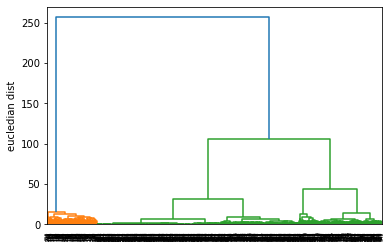

In [23]:
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch
dedrogram = sch.dendrogram(sch.linkage(scaled_X,method = 'ward'))
plt.ylabel('eucledian dist')
plt.show

In [24]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters=5, affinity = 'euclidean', linkage = 'ward')
Y_hc = hc.fit_predict(scaled_X)

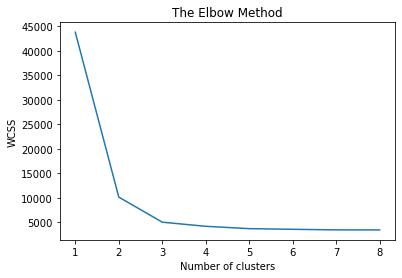

In [25]:
wcss = []
for i in range(1, 9):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(scaled_X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 9), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [26]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(scaled_X)

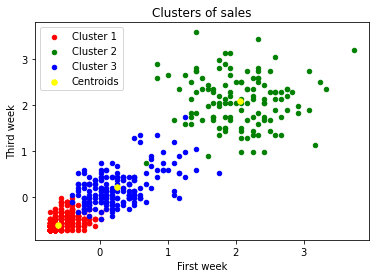

In [27]:
plt.scatter(scaled_X[y_kmeans == 0]['W0'], scaled_X[y_kmeans == 0]['W2'], s = 20, c = 'red', label = 'Cluster 1')
plt.scatter(scaled_X[y_kmeans == 1]['W0'], scaled_X[y_kmeans == 1]['W2'], s = 20, c = 'green', label = 'Cluster 2')
plt.scatter(scaled_X[y_kmeans == 2]['W0'], scaled_X[y_kmeans == 2]['W2'], s = 20, c = 'blue', label = 'Cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 30, c = 'yellow', label = 'Centroids')
plt.title('Clusters of sales')
plt.xlabel('First week')
plt.ylabel('Third week')
plt.legend()
plt.show()

In [28]:
data.isnull().values.any()

False

In [33]:
data_norm1 = data.copy()
#data_norm1 = data_norm[['{}'.format(i) for i in range(0,52)]]
data_norm1

,W0,W1,W2,W3,W4,W5,W6,W7,W8,W9,...,W44,W45,W46,W47,W48,W49,W50,W51,MIN,MAX
0,11,12,10,8,13,12,14,21,6,14,...,8,10,12,3,7,6,5,10,3,21
1,7,6,3,2,7,1,6,3,3,3,...,5,1,1,4,5,1,6,0,0,10
2,7,11,8,9,10,8,7,13,12,6,...,5,5,7,8,14,8,8,7,3,14
3,12,8,13,5,9,6,9,13,13,11,...,3,4,6,8,14,8,7,8,2,19
4,8,5,13,11,6,7,9,14,9,9,...,7,12,6,6,5,11,8,9,3,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
806,0,0,1,0,0,2,1,0,0,1,...,1,0,0,1,0,0,2,0,0,3
807,0,1,0,0,1,2,2,6,0,1,...,4,2,4,5,5,5,6,5,0,7
808,1,0,0,0,1,1,2,1,1,0,...,0,2,2,0,0,0,4,3,0,4
809,0,0,0,1,0,0,0,0,1,0,...,0,1,1,0,0,0,2,0,0,2


In [34]:
from sklearn.decomposition import PCA

In [35]:
pca = PCA(n_components=3)
pca_data_norm = PCA(n_components=2)
pca_data_norm.fit_transform(data_norm1.T)

array([[ 4.09270681e+00, -1.19314278e+01],
       [ 1.86194799e+01, -2.04067809e+01],
       [ 3.25720587e+01, -3.05592426e+01],
       [ 5.15471393e+01, -3.15207663e+01],
       [ 3.77596134e+01, -2.03291676e+01],
       [ 3.04533966e+01, -1.61688626e+01],
       [ 4.55636157e+01, -2.86150761e+01],
       [ 3.73592061e+01, -2.25378025e+01],
       [ 5.27512745e+01, -2.18116020e+01],
       [ 4.31636843e+01, -1.76704572e+01],
       [ 5.42042601e+01, -2.86076083e+01],
       [ 3.88276386e+01, -1.87951938e+01],
       [ 5.17816955e+01, -1.80433391e+01],
       [ 4.45846321e+01, -1.96889611e+01],
       [ 5.05777125e+01, -1.66811132e+01],
       [ 6.25184896e+01, -1.25304058e+01],
       [ 6.40082276e+01, -1.93281155e+01],
       [ 5.30921074e+01,  8.14519508e-01],
       [ 5.79240036e+01, -1.09871868e+01],
       [ 4.13673447e+01,  2.05839381e-01],
       [ 5.36799165e+01,  7.49181180e+00],
       [ 3.77534083e+01,  8.41697561e+00],
       [ 4.33719918e+01,  2.04409563e+01],
       [ 3.

In [36]:
print(pca_data_norm.explained_variance_ratio_)
print(pca_data_norm.explained_variance_ratio_.sum())

[0.31369388 0.08894214]
0.4026360208794752


In [37]:
#The difficulty so far is that PCA is not able to squeeze much variance into only 2 components,
#or even 3. Thats a problem because 3 is the most that we mere mortals can plot.

#If we take a look at the variance ratio for the 1st component, 8.65%
#that implies that even though we don't get a nice clean dimension reduction,
#we can still do better than 811 dimensions. 
#to see how many components we need to explain an arbitrary 90% of the variance

At least 37 components needed to explain 90.0% of the variance.


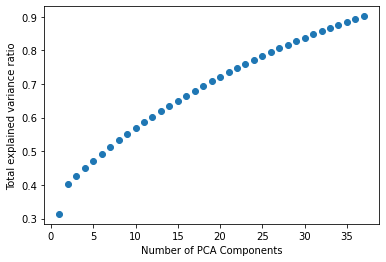

In [38]:
def determineNComponents(data, variance_threshold=0.90):    
    n_components = 0
    sum_explained_variance = 0
    sum_list = []
    while sum_explained_variance < variance_threshold:
        n_components += 1
        pca_data_norm = PCA(n_components=n_components)
        pca_data_norm.fit_transform(data)
        sum_explained_variance = pca_data_norm.explained_variance_ratio_.sum()
        sum_list.append(sum_explained_variance)
    plt.scatter(np.arange(1,n_components+1,1),sum_list)
    plt.xlabel("Number of PCA Components")
    plt.ylabel("Total explained variance ratio")
    print("At least {} components needed to explain {}% of the variance.".format(n_components,variance_threshold*100))
    return n_components
min_components  = determineNComponents(data_norm1.T)